In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
flights = pd.read_csv('../data/flights.csv')
flights=flights.sample(n=100000)
flights.head()

C:\Users\Huynh Hau\AppData\Local\Temp\ipykernel_4204\2227832255.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('../data/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5622836,2015,12,19,6,OO,5674,N131SY,SFO,TUS,830,...,1149.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4963091,2015,11,6,5,WN,1507,N708SW,MDW,OMA,1515,...,1640.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5670812,2015,12,22,2,DL,160,N950DN,LAS,MSP,919,...,1418.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5566650,2015,12,15,2,DL,2625,N327NB,IND,MSP,1735,...,1821.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4295043,2015,9,25,5,WN,2736,N252WN,MDW,AUS,815,...,1028.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.shape #xem kích thước dữ liệu

(100000, 31)

In [4]:
flights.isnull().values.any()  #kiểm tra xem dữ liệu có bị thiếu hay không

True

In [5]:
flights.isnull().sum()  # đếm số lượng giá trị thiếu CANCELLATION_REASON

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              284
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1498
DEPARTURE_DELAY         1498
TAXI_OUT                1545
WHEELS_OFF              1545
SCHEDULED_TIME             0
ELAPSED_TIME            1857
AIR_TIME                1857
DISTANCE                   0
WHEELS_ON               1607
TAXI_IN                 1607
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1607
ARRIVAL_DELAY           1857
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98441
AIR_SYSTEM_DELAY       81754
SECURITY_DELAY         81754
AIRLINE_DELAY          81754
LATE_AIRCRAFT_DELAY    81754
WEATHER_DELAY          81754
dtype: int64

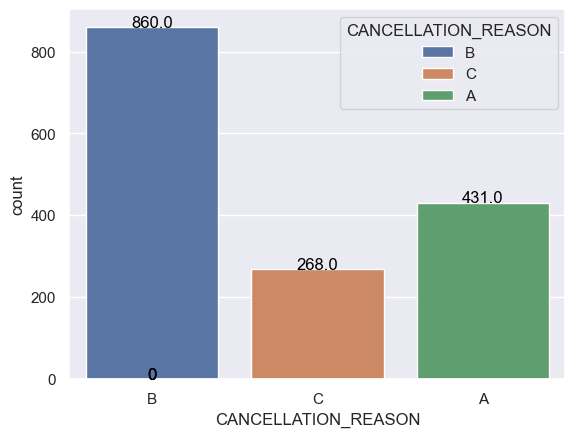

In [6]:
# đếm số lần hủy chuyến bay 
sns.set(style="darkgrid")
ax = sns.countplot(x='CANCELLATION_REASON', data=flights, hue='CANCELLATION_REASON')

# Thêm nhãn trên cột
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', size=12)

plt.show()


- A: Nguyên nhân do hãng hàng không(Airline/Carrier) hủy chuyến do thiếu nhân lực, thay đổi lịch trình, hoặc vấn đề tài chính
- B: Nguyên nhân do thời tiết(Weather)
- C: Hủy do vấn đề tại sân bay (National Air System):sự chậm trễ trong hệ thống điều khiển không lưu, các vấn đề về an ninh tại sân bay, và các vấn đề vận hành tại sân bay mà không do hãng hàng không hoặc thời tiết gây ra.
- D: Hủy do an ninh (Security): Hủy chuyến bay do các vấn đề liên quan đến an ninh, bao gồm nhưng không giới hạn ở việc phát hiện các mối đe dọa an ninh, sự cố an ninh tại sân bay, hoặc các quy định an ninh được thắt chặt.

->>Chúng ta có thể dễ dàng quan sát từ biểu đồ rằng phần lớn thời tiết là nguyên nhân gây ra sự chậm trễ của chuyến bay.

<Axes: xlabel='MONTH', ylabel='count'>

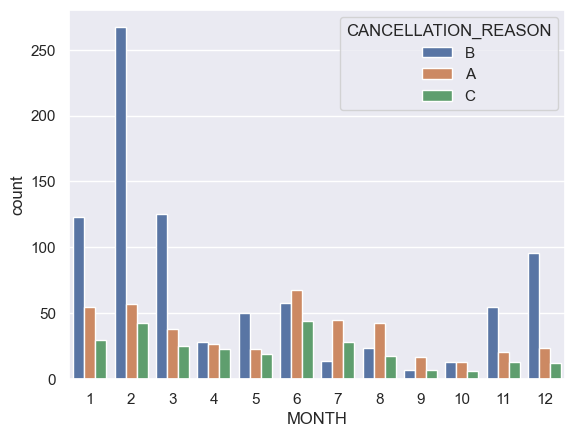

In [7]:
#biểu đồ thể hiện số lượng các chuyến bay bị hủy bỏ theo từng tháng 
sns.countplot(x="MONTH",hue ="CANCELLATION_REASON",data=flights)

- Màu cam là lý do chính dẫn đến việc hủy chuyến bay, đặc biệt là trong tháng 2 nơi có số lượng hủy bỏ cao nhất.
- Màu xanh lam và màu xanh lục xuất hiện ít hơn, nhưng vẫn góp phần vào tổng số hủy chuyến mỗi tháng.
- Số lượng hủy chuyến có xu hướng giảm từ tháng 2 đến tháng 9, sau đó tăng lên trở lại vào tháng 12.
- --> biểu đồ cung cấp một cái nhìn tổng quan về việc hủy chuyến bay,có thể giúp các hãng hàng không hoặc cơ quan quản lý phân tích và cải thiện kế hoạch hoạt động của mình.


C:\Users\Huynh Hau\AppData\Local\Temp\ipykernel_4204\1501421197.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


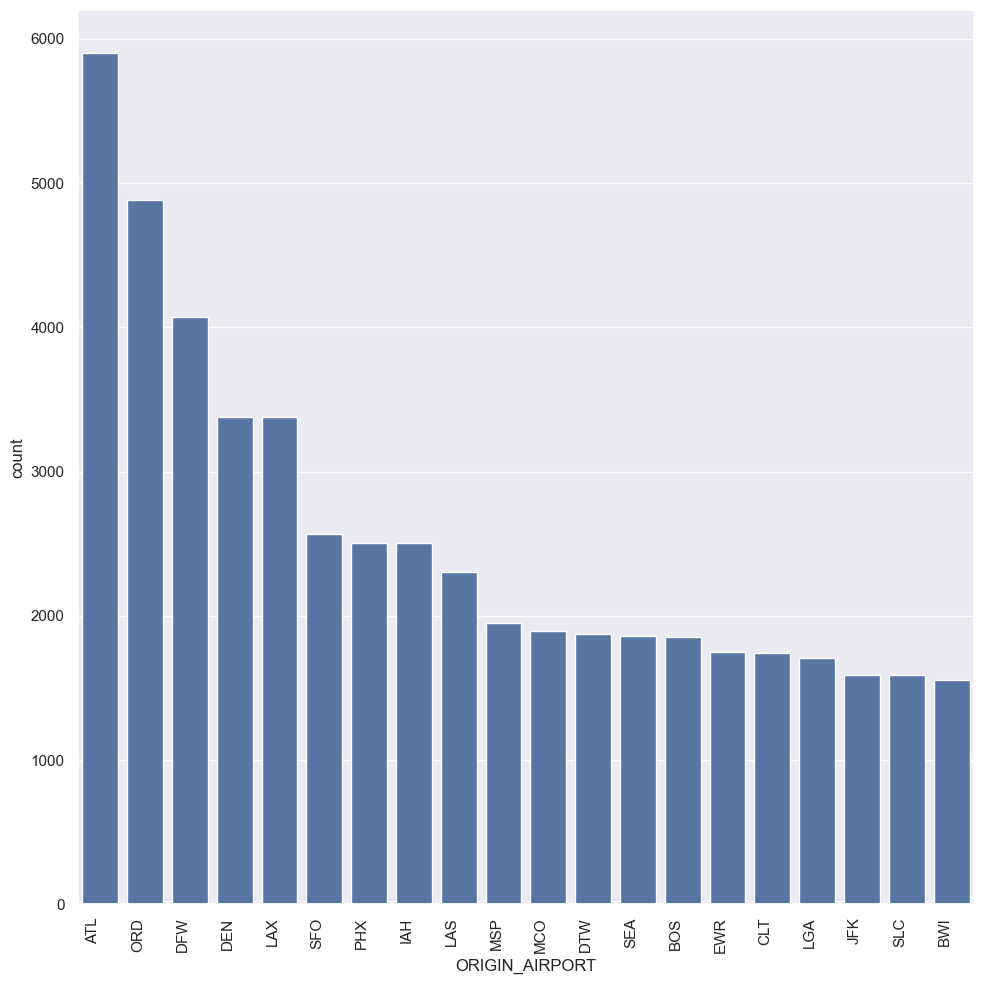

In [8]:
# biểu đồ sẽ thể hiện 20 sân bay có số lượng chuyến bay khởi hành nhiều nhất
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

-  Số lượng chuyến bay giảm dần từ sân bay có số lượng nhiều nhất đến sân bay có số lượng ít nhất trong số 20 sân bay được hiển thị.

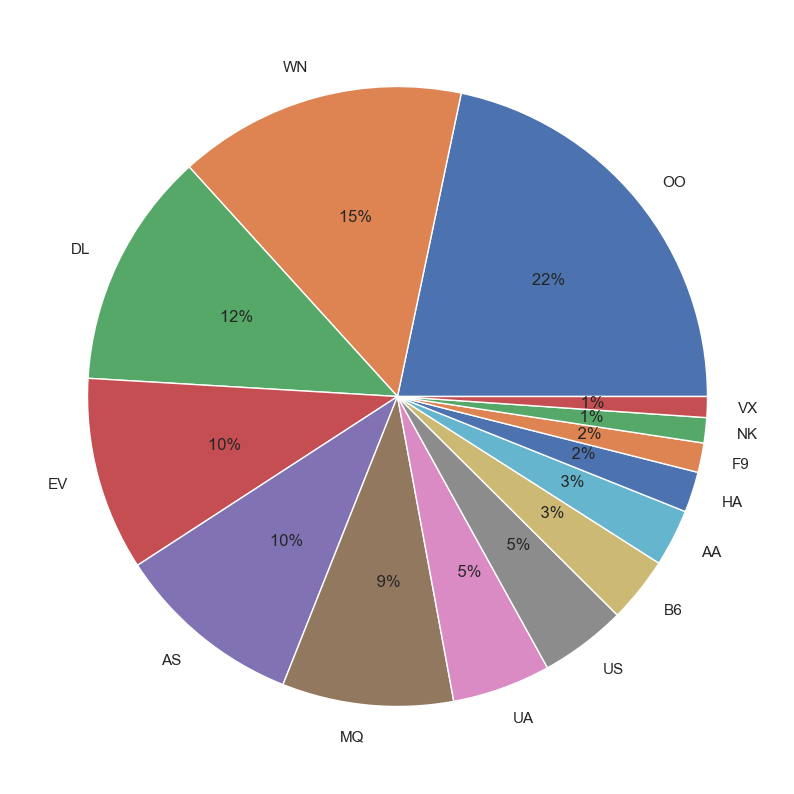

In [9]:
#số lượng chuyến bay theo hãng hàng không
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()
     

- Hãng VX chiếm 22% trong khi đó một số hãng khác như  00,AS,F9,UA có tỉ lệ thấp hơn,chỉ từ 1% đến 3%.
- ->Biểu đồ này rất hữu ích trong việc phân tích nhanh chóng phân phối số lượng chuyến bay giữa các hãng hàng không và đưa ra so sánh tỷ lệ giữa chúng.

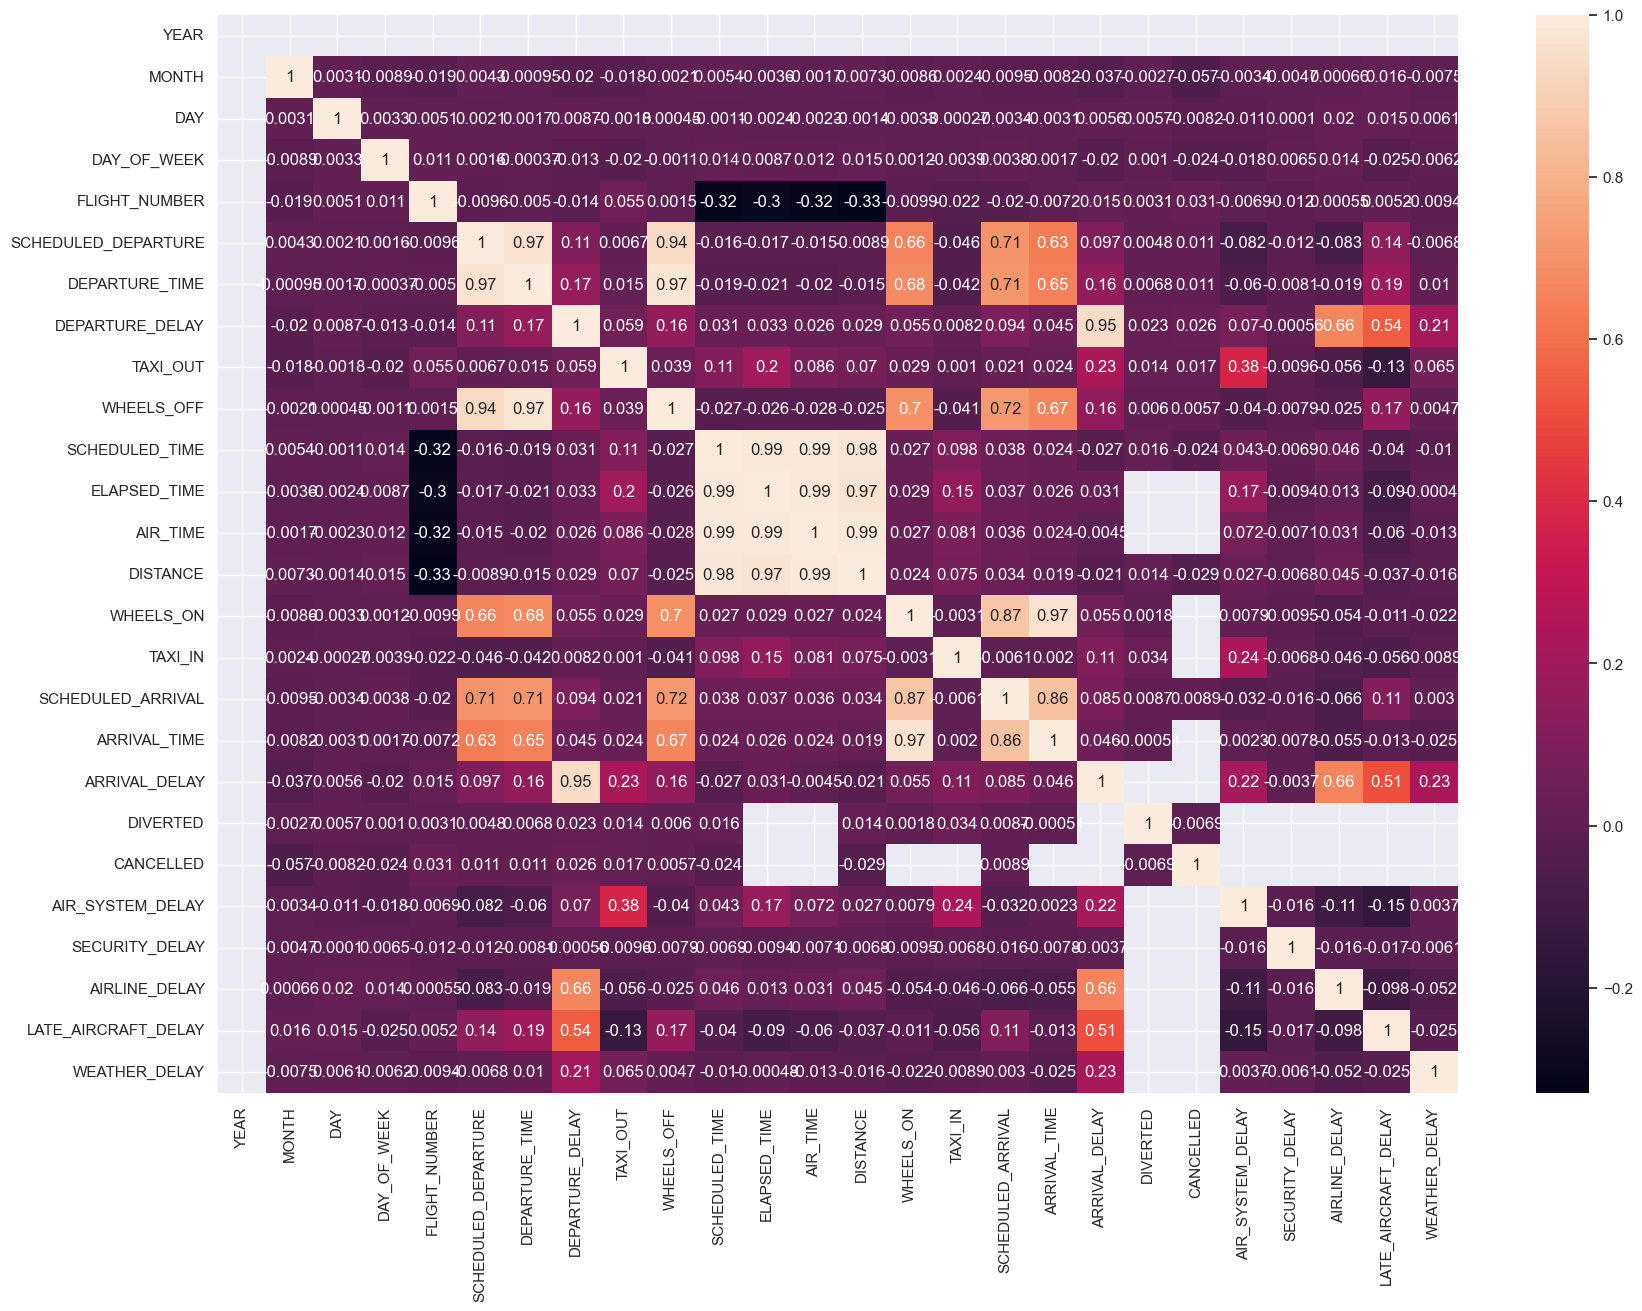

In [10]:
# Chọn các cột dữ liệu dạng số
flights_nhiet= flights.select_dtypes(include=[np.number])
# Tính hệ số tương quan cho các cột số
correlation_matrix = flights_nhiet.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(20,14))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


- Mối quan hệ tương quan cao giữa "Departure Delay" và "Arrival Delay"(thời gian khởi hành trễ và thời gian đến trễ của chuyến bay, )trên biểu đồ nhiệt tương quan là 0.94,điều này cho thấy một mối quan hệ tương quan dương mạnh giữa việc chậm trễ khởi hành và chậm trễ khi đến,nó cho thấy một xu hướng chung là chuyến bay nào bắt đầu muộn thì thường kết thúc muộn.

In [11]:
# Tạo ra 
corr=flights_nhiet.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.003143,-0.008930,-0.019009,0.004307,-0.000951,-0.019816,-0.018316,-0.002050,...,-0.009529,-0.008208,-0.036572,-0.002666,-0.057410,-0.003414,-0.004727,0.000664,0.015663,-0.007507
DAY,NaN,0.003143,1.000000,0.003333,0.005127,0.002052,0.001717,0.008736,-0.001814,0.000447,...,-0.003400,-0.003121,0.005599,0.005653,-0.008249,-0.011400,0.000101,0.020404,0.015217,0.006083
DAY_OF_WEEK,NaN,-0.008930,0.003333,1.000000,0.011110,0.001622,-0.000366,-0.012605,-0.019874,-0.001070,...,0.003795,0.001700,-0.020395,0.001014,-0.024461,-0.018401,0.006524,0.014298,-0.025334,-0.006225
FLIGHT_NUMBER,NaN,-0.019009,0.005127,0.011110,1.000000,-0.009595,-0.004988,-0.014194,0.055077,0.001537,...,-0.019958,-0.007245,0.015086,0.003138,0.031013,-0.006947,-0.012081,0.000547,0.005213,-0.009383
SCHEDULED_DEPARTURE,NaN,0.004307,0.002052,0.001622,-0.009595,1.000000,0.965546,0.107324,0.006688,0.941544,...,0.708615,0.631977,0.097481,0.004811,0.010641,-0.082341,-0.011921,-0.083462,0.143502,-0.006838
DEPARTURE_TIME,NaN,-0.000951,0.001717,-0.000366,-0.004988,0.965546,1.000000,0.171412,0.014605,0.974233,...,0.712890,0.649439,0.159339,0.006779,0.011051,-0.059532,-0.008096,-0.019231,0.194098,0.009963
DEPARTURE_DELAY,NaN,-0.019816,0.008736,-0.012605,-0.014194,0.107324,0.171412,1.000000,0.058981,0.162909,...,0.094484,0.045101,0.946700,0.022718,0.026473,0.070297,-0.000563,0.664405,0.543960,0.206121
TAXI_OUT,NaN,-0.018316,-0.001814,-0.019874,0.055077,0.006688,0.014605,0.058981,1.000000,0.038950,...,0.021129,0.023941,0.226540,0.013549,0.016915,0.379784,-0.009648,-0.055995,-0.134160,0.064976
WHEELS_OFF,NaN,-0.002050,0.000447,-0.001070,0.001537,0.941544,0.974233,0.162909,0.038950,1.000000,...,0.723495,0.667041,0.155930,0.005965,0.005667,-0.040153,-0.007851,-0.025325,0.167537,0.004655


- Ví dụ, SCHEDULED_DEPARTURE và DEPARTURE_TIME có tương quan rất cao (gần bằng 1), điều này có nghĩa là thời gian khởi hành dự kiến và thời gian khởi hành thực tế có mối quan hệ tuyến tính mạnh mẽ và tích cực với nhau,  vì thường thì chuyến bay cất cánh gần với thời gian dự kiến của nó.

In [12]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [13]:
# Đọc dữ liệu aiports.csv
airport = pd.read_csv('../data/airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [14]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5622836,12,19,6,OO,SFO,TUS,830,18.0,751,6.0
4963091,11,6,5,WN,MDW,OMA,1515,-3.0,423,0.0
5670812,12,22,2,DL,LAS,MSP,919,1.0,1299,-9.0
5566650,12,15,2,DL,IND,MSP,1735,-2.0,503,-10.0
4295043,9,25,5,WN,MDW,AUS,815,-6.0,972,-22.0
...,...,...,...,...,...,...,...,...,...,...
3335139,7,27,1,DL,ATL,BWI,1628,28.0,577,27.0
1805628,4,25,6,AS,SEA,SAN,2115,-12.0,1050,-35.0
4681263,10,19,1,WN,OTHER,OTHER,1705,-3.0,302,-11.0
84174,1,6,2,WN,CMH,TPA,1035,36.0,829,27.0


In [15]:
print(flights.ORIGIN_AIRPORT.nunique())         #tính số lượng các giá trị duy nhất trong cột "ORIGIN_AIRPORT" , cho biết có bao nhiêu sân bay khác nhau được sử dụng làm điểm xuất phát.
print(flights.DESTINATION_AIRPORT.nunique())#tính số lượng các giá trị duy nhất trong cột "DESTINATION_AIRPORT.Nó sẽ cho biết có bao nhiêu sân bay khác nhau được sử dụng làm điểm đến.
print(flights.AIRLINE.nunique())

320
319
14


- Số lượng sân bay xuất phát (ORIGIN_AIRPORT): 321
- Số lượng sân bay đích đến (DESTINATION_AIRPORT): 321
- Số lượng hãng hàng không (AIRLINE): 14
- Có tổng cộng 321 sân bay khác nhau được sử dụng làm điểm xuất phát của các chuyến bay.
- Cũng có tổng cộng 321 sân bay khác nhau được sử dụng làm điểm đến của các chuyến bay.
- Trong khi đó, có tổng cộng 14 hãng hàng không khác nhau mà có dữ liệu được ghi lại.

In [16]:
flights=flights.dropna() # xóa giá trị NaN
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5622836,12,19,6,OO,SFO,TUS,830,18.0,751,6.0
4963091,11,6,5,WN,MDW,OMA,1515,-3.0,423,0.0
5670812,12,22,2,DL,LAS,MSP,919,1.0,1299,-9.0
5566650,12,15,2,DL,IND,MSP,1735,-2.0,503,-10.0
4295043,9,25,5,WN,MDW,AUS,815,-6.0,972,-22.0
...,...,...,...,...,...,...,...,...,...,...
3335139,7,27,1,DL,ATL,BWI,1628,28.0,577,27.0
1805628,4,25,6,AS,SEA,SAN,2115,-12.0,1050,-35.0
4681263,10,19,1,WN,OTHER,OTHER,1705,-3.0,302,-11.0
84174,1,6,2,WN,CMH,TPA,1035,36.0,829,27.0


In [17]:
flights.isna().any()

MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_DELAY        False
DISTANCE               False
ARRIVAL_DELAY          False
dtype: bool

In [18]:

flights.shape

(98143, 10)

In [19]:
# tiền xử lý dữ liệu thay thế các ngày tương ứng
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
df

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5622836,12,19,FRIDAY,OO,SFO,TUS,830,18.0,751,6.0
4963091,11,6,THURSDAY,WN,MDW,OMA,1515,-3.0,423,0.0
5670812,12,22,MONDAY,DL,LAS,MSP,919,1.0,1299,-9.0
5566650,12,15,MONDAY,DL,IND,MSP,1735,-2.0,503,-10.0
4295043,9,25,THURSDAY,WN,MDW,AUS,815,-6.0,972,-22.0
...,...,...,...,...,...,...,...,...,...,...
3335139,7,27,SUNDAY,DL,ATL,BWI,1628,28.0,577,27.0
1805628,4,25,FRIDAY,AS,SEA,SAN,2115,-12.0,1050,-35.0
4681263,10,19,SUNDAY,WN,OTHER,OTHER,1705,-3.0,302,-11.0
84174,1,6,MONDAY,WN,CMH,TPA,1035,36.0,829,27.0


In [20]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True,dtype=int)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
5622836,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4963091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5670812,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5566650,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4295043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335139,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1805628,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4681263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
df_cat.columns  

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=656)

In [22]:

df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [23]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [24]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
5622836,12,19,830,18.0,751,6.0
4963091,11,6,1515,-3.0,423,0.0
5670812,12,22,919,1.0,1299,-9.0
5566650,12,15,1735,-2.0,503,-10.0
4295043,9,25,815,-6.0,972,-22.0
...,...,...,...,...,...,...
3335139,7,27,1628,28.0,577,27.0
1805628,4,25,2115,-12.0,1050,-35.0
4681263,10,19,1705,-3.0,302,-11.0
84174,1,6,1035,36.0,829,27.0


In [25]:
data=pd.concat([df,df_cat],axis=1)
data
     

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
5622836,12,19,830,18.0,751,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4963091,11,6,1515,-3.0,423,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5670812,12,22,919,1.0,1299,-9.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5566650,12,15,1735,-2.0,503,-10.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4295043,9,25,815,-6.0,972,-22.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335139,7,27,1628,28.0,577,27.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1805628,4,25,2115,-12.0,1050,-35.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4681263,10,19,1705,-3.0,302,-11.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84174,1,6,1035,36.0,829,27.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:

data.shape

(98143, 662)

In [27]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [28]:
final_data_samples = []
for i in range(100):
    final_data = data.sample(n=60000)
    final_data_samples.append(final_data)

In [29]:
# Khởi tạo list để lưu trữ các chỉ số đánh giá
r2_train_scores_rf = []
r2_test_scores_rf = []
maes_rf = []
mses_rf = []
rmses_rf = []

for final_data in final_data_samples:
    X = final_data.drop("DEPARTURE_DELAY", axis=1)
    Y = final_data["DEPARTURE_DELAY"]
    # Tách dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Giữ random_state cố định hoặc thay đổi nếu muốn
    # Huấn luyện mô hình
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train, y_train)
    # Dự đoán và đánh giá
    y_pred = reg_rf.predict(X_test)
    # Đánh giá
    r2_train_scores_rf.append(reg_rf.score(X_train, y_train))
    r2_test_scores_rf.append(reg_rf.score(X_test, y_test))
    maes_rf.append(metrics.mean_absolute_error(y_test, y_pred))
    mses_rf.append(metrics.mean_squared_error(y_test, y_pred))
    rmses_rf.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [30]:
# Tính trung bình các chỉ số
avg_r2_train = np.mean(r2_train_scores_rf)
avg_r2_test = np.mean(r2_test_scores_rf)
avg_mae = np.mean(maes_rf)
avg_mse = np.mean(mses_rf)
avg_rmse = np.mean(rmses_rf)

In [31]:
# In ra các chỉ số đánh giá trung bình
print("Trung bình các chỉ số đánh giá sau 10 lần lặp:")
print(f'Average R2 (Train): {avg_r2_train:.4f}')
print(f'Average R2 (Test): {avg_r2_test:.4f}')
print(f'Average MAE: {avg_mae:.4f}')
print(f'Average MSE: {avg_mse:.4f}')
print(f'Average RMSE: {avg_rmse:.4f}')

Trung bình các chỉ số đánh giá sau 10 lần lặp:
Average R2 (Train): 0.9903
Average R2 (Test): 0.9270
Average MAE: 5.9913
Average MSE: 100.0373
Average RMSE: 10.0006


In [32]:
pp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pp

,Actual,Predicted
1421710,-5.0,-5.98
4166811,-4.0,-0.82
1794787,-4.0,-3.13
1821703,-8.0,-2.19
5367448,-7.0,-6.89
...,...,...
4241120,0.0,16.52
2634215,38.0,51.58
3802248,-4.0,-4.02
2763740,-3.0,-2.63


In [33]:
from sklearn.model_selection import RandomizedSearchCV 
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = [None, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [34]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [35]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [36]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   9.1s
[CV] END max_depth=15, max_features=s

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
rf_random.best_params_


{'n_estimators': 61,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': None,
 'max_depth': 15}

In [39]:

p=rf_random.predict(X_test)
p

array([-5.53249709, -2.29030495, -2.77644992, ..., -3.3318158 ,
       -4.86349284, 12.3712546 ])

In [40]:
metrics.r2_score(y_test,p)

0.9303827425949492

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))
     

MAE: 6.0349954429105
MSE: 95.94278086807616
RMSE: 9.795038584307678


In [42]:

zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
1421710,-5.0,-5.532497
4166811,-4.0,-2.290305
1794787,-4.0,-2.776450
1821703,-8.0,-2.526999
5367448,-7.0,-7.083273
...,...,...
4241120,0.0,16.802012
2634215,38.0,51.123072
3802248,-4.0,-3.331816
2763740,-3.0,-4.863493


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [52]:

GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [53]:

print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.0478616337949465
MSE: 96.13591120366014
RMSE: 9.804892207651246


In [54]:
metrics.r2_score(y_test,pre)

0.9302426048569826

In [47]:

gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
1421710,-5.0,-4.069396
4166811,-4.0,-3.610018
1794787,-4.0,-2.123363
1821703,-8.0,-2.577971
5367448,-7.0,-4.979389
...,...,...
4241120,0.0,16.326998
2634215,38.0,50.955725
3802248,-4.0,-2.439703
2763740,-3.0,-3.418719


In [48]:

def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK,FLIGHTS_STATUS,SEATS_OCCUPIED):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:    
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1
    # Danh sách các hãng hàng không với số ghế 230
    airlines_with_230_seats = ["AIRLINE_B6", "AIRLINE_AA", "AIRLINE_WN", "AIRLINE_EV", "AIRLINE_DL","AIRLINE_OO"]
    total_seats = 230 if AIRLINE in airlines_with_230_seats else 350
    min_seats_required = total_seats / 2  # Số lượng ghế tối thiểu cần có là một nửa tổng số ghế

    if SEATS_OCCUPIED <min_seats_required:
        FLIGHTS_STATUS = "Cancelled"
        return -100, FLIGHTS_STATUS  # Trả về -100 làm giá trị biểu thị hủy

    prediction = gbr.predict([x])[0]
    return prediction, FLIGHTS_STATUS

In [49]:

res,FLIGHTS_STATUS= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY','Weather',174)
res
    

c:\Users\Huynh Hau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.5977038228476985

In [50]:
if FLIGHTS_STATUS == "Cancelled":
    print("Thông báo: Chuyến bay đã bị hủy do số lượng ghế đặt không đạt ngưỡng tối thiểu theo chính sách của công ty.")
elif FLIGHTS_STATUS == "Weather":
    print("Thông báo: Theo chính sách của công ty, chuyến bay bị trì hoãn do điều kiện thời tiết xấu. Chúng tôi sẽ cập nhật thêm thông tin trong thời gian sớm nhất.")
elif FLIGHTS_STATUS == "Airline":
    print("Thông báo: Theo chính sách của công ty, chuyến bay bị trì hoãn do vấn đề kỹ thuật từ hãng hàng không. Chúng tôi đang nỗ lực khắc phục và sẽ thông báo lịch trình mới ngay khi có thể.")
elif FLIGHTS_STATUS == "NAS":
    print("Thông báo: Theo chính sách của công ty, chuyến bay bị trì hoãn do sự cố hệ thống hàng không quốc gia. Xin vui lòng chờ đợi thông báo tiếp theo từ chúng tôi.")
elif FLIGHTS_STATUS == "SECURITY":
    print("Thông báo: Theo chính sách của công ty, chuyến bay bị trì hoãn do yêu cầu kiểm tra an ninh tăng cường. An toàn của hành khách và phi hành đoàn là ưu tiên hàng đầu của chúng tôi.")
else:
    if res <= -15:
        print("Flight is delayed")
    else:
        print("Flight is not delayed")

Thông báo: Theo chính sách của công ty, chuyến bay bị trì hoãn do điều kiện thời tiết xấu. Chúng tôi sẽ cập nhật thêm thông tin trong thời gian sớm nhất.
